# Problem:
Find the moviment equations of the 2 DoF Scara arm.

## Frames and Variables
Initialy, we need to define our reference frames and the symbolic variables.The first **Reference Frame** `B0`, is located in the same high as the arm and pointing in the rotating joint. The next frame,`B1`, is a **Moving Frame**. It follows the rotations of the first frame, therefora, related by a rotations of $\theta_1$ related to `B0`. Finally, the last frame rotates $\theta_2$ regarding `B1`.

In [2]:
# Funções e Bibliotecas Utilizadas
from sympy import symbols, pprint, simplify, Eq, diff
from sympy.physics.mechanics import *
from sympy.physics.mechanics.functions import inertia
init_vprinting()

# Variáveis Simbólicas
theta_1, theta_2 = dynamicsymbols('theta_1 theta_2')
dtheta_1, dtheta_2 = dynamicsymbols('theta_1 theta_2', 1)
tau_1, tau_2 = symbols('tau_1 tau_2')
l_1, l_2 = symbols('l_1 l_2', positive = True)
r_1, r_2 = symbols('r_1 r_2', positive = True)
m_1, m_2, g = symbols('m_1 m_2 g')
I_1_zz, I_2_zz = symbols('I_{1zz}, I_{2zz}') 

# Referenciais 
B0 = ReferenceFrame('B0')                 # Referencial Inercial
B1 = ReferenceFrame('B1')     
B1.orient(B0, 'Axis', [theta_1, B0.z])    # Referencial móvel: theta_1 em relação a B0.z 
B2 = ReferenceFrame('B2')
B2.orient(B1, 'Axis', [theta_2, B1.z])    # Referencial móvel: theta_2 em relação a B1.z 


## Points e Rigid Bodies
Now that the frames are defined, we can start to place the fixed points.The points `CM_1` and `CM_2` represent the **Center of Mass ** of the arm's links. Each of this links have their own moment, `I_1` e `I_2`. Furthermore, points O and A represent the fixed joints.

In [3]:
# Pontos e Centros de Massa
O = Point('O')
O.set_vel(B0, 0)
A = Point('A')     
A.set_pos(O, l_1 * B1.x)                     
A.v2pt_theory(O, B0, B1)
CM_1 = Point('CM_1')
CM_1.set_pos(O, r_1 * B1.x)
CM_1.v2pt_theory(O, B0, B1)
CM_2 = Point('CM_2')
CM_2.set_pos(A, r_2 * B2.x)
CM_2.v2pt_theory(O, B0, B2)

# Corpos Rígidos
I_1 = inertia(B1, 0, 0, I_1_zz)            
E_1 = RigidBody('Elo_1', CM_1, B1, m_1, (I_1, CM_1)) # Elo 1
I_2 = inertia(B1, 0, 0, I_1_zz)                 
E_2 = RigidBody('Elo_2', CM_2, B2, m_2, (I_2, CM_2)) # Elo 2

 ## Potencial Energy and Generalized Forces
**Sympy** needs explicit definition of external potencial energies in the beodies.As the arm is only acting in the $(x,y)$ plane, the gravity force will not perfom any influence in the moviment equations.

In [4]:
# Energia Potencial
P_1 = -m_1 * g * B0.z
r_1_CM = CM_1.pos_from(O).express(B0)
E_1.potential_energy = r_1_CM.dot(P_1)
P_2 = -m_2 * g * B0.z
r_2_CM = CM_2.pos_from(O).express(B0).simplify()
E_2.potential_energy = r_2_CM.dot(P_2)

# Forças/Momentos Generalizados
FL = [(B1, tau_1 * B0.z),(B2, tau_2 * B0.z)]

(E_2.potential_energy, E_1.potential_energy)

## Lagrangian e Moviment Equations
Finally, we can solve the langrangian and movimento equations of the system.In **Sympy**, we call the `Lagrangian` method andthe  `LagrangesMethod` class to solve the system.

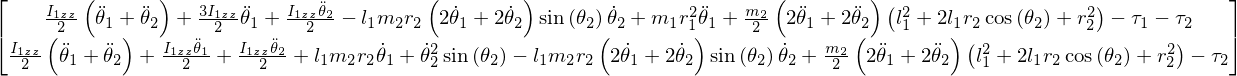

In [5]:
# Método de Lagrange
L = Lagrangian(B0, E_1, E_2)
L = L.simplify()
LM = LagrangesMethod(L, [theta_1, theta_2], frame=B0, forcelist=FL)

# Equações do Movimento
L_eq = LM.form_lagranges_equations()
L_eq

We still can decouple the **Moviment Equations** using the `rhs` method on the previous class.

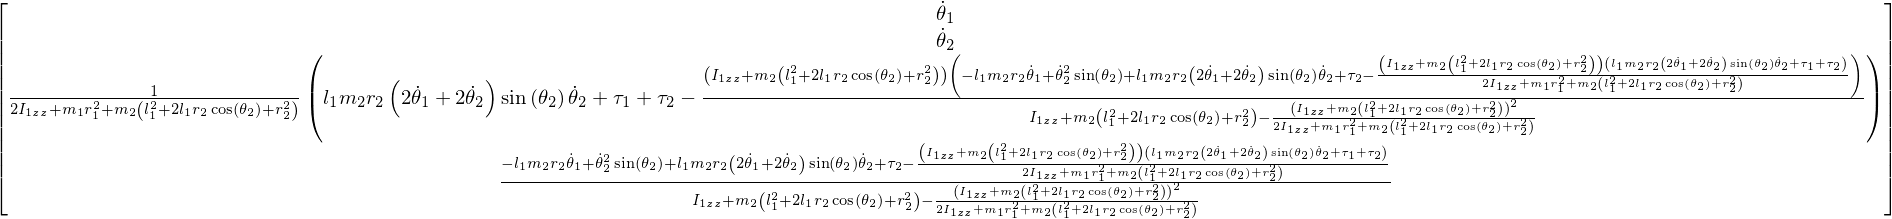

In [6]:
# Equações Prontas para Solução Numérica
rhs = LM.rhs()
rhs